In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
import math
%pylab inline
import pylab as pl
from pandas.tools.plotting import scatter_matrix

Populating the interactive namespace from numpy and matplotlib


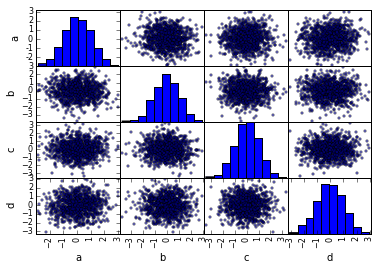

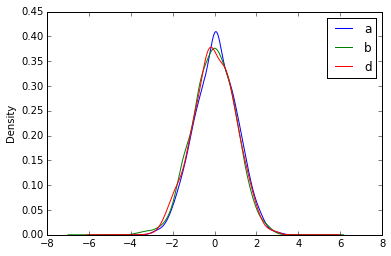

In [42]:
# I have used this to understand and test the functionality fo df.plot and scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df)
df.plot(['c'],kind='kde')

In [32]:
# Reading the geo shape file using the geopandas
geo_nou = gp.GeoDataFrame.from_file('Manhattan/MNMapPLUTO.shp')

In [40]:
geo_nou.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [33]:
#reading the geodata from the below mentioned url:
#https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z
geo_data = gp.GeoDataFrame.from_csv('Energy_and_water.csv')
#geo_data.columns

In [34]:
geo_data['siteEnergy']= geo_data['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
geo_data['buildArea'] = geo_data['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
    

In [35]:
#Adding a new column BBL that will help in joining the 2 tables
geo_data['BBL']=geo_data['NYC Borough, Block, and Lot (BBL)']

####Function to check if the record in the column is float or not
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

####For checking each record of the column if it is float or not 
cyes = 0
cno = 0
for i in range(1,len(geo_data['Site EUI(kBtu/ft2)'])):
    indx=(canconvert(geo_data['Site EUI(kBtu/ft2)'][i]))
    if indx==True:
        cyes += 1
    else:
        cno +=1
        
print cyes , cno

for j in range(1,len(geo_nou['UnitsTotal'])):
    indx2=(canconvert(geo_nou['UnitsTotal'][j]))

for k in range(1,len(geo_data['Reported Property Floor Area (Building(s)) (ft²)'])):
    indx3=(canconvert(geo_data['Reported Property Floor Area (Building(s)) (ft²)'][k]))

####Converting the non float values to 'NaN'
for i in range(1,len(geo_data['Site EUI(kBtu/ft2)'])):
    if  geo_data['Site EUI(kBtu/ft2)'][i] == 'See Primary BBL':
            geo_data['Site EUI(kBtu/ft2)'][i] ='NaN'
        #geo_data['Site EUI(kBtu/ft2)'][i]='NaN'
        #print 
        


####Converting the non float values to 'NaN'
for i in range(1,len(geo_data['Reported Property Floor Area (Building(s)) (ft²)'])):
    if  geo_data['Reported Property Floor Area (Building(s)) (ft²)'][i] == 'See Primary BBL':
            geo_data['Reported Property Floor Area (Building(s)) (ft²)'][i] ='0.0'
        #geo_data['Site EUI(kBtu/ft2)'][i]='NaN'
        #print 
        
geo_data['Site EUI(kBtu/ft2)'][~indx]=float('NaN')

geo_data['Reported Property Floor Area (Building(s)) (ft²)'][~indx3]=float('NaN')

geo_nou['UnitsTotal'][~indx2]=float('NaN')

In [36]:
#Merging the 2 data sets using pandas with BBL as primary key
merged_data = pd.merge(geo_data,geo_nou,on='BBL')

In [38]:
merged_data['totalEnergy'] = merged_data['siteEnergy'] * merged_data['buildArea']


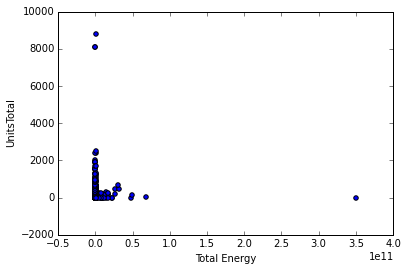

In [72]:
plt.scatter(merged_data['totalEnergy'],merged_data['UnitsTotal'])
plt.xlabel('Total Energy')
plt.ylabel('UnitsTotal')
plt.xlim=(1000,1e10)
plt.ylim=(1,4000)

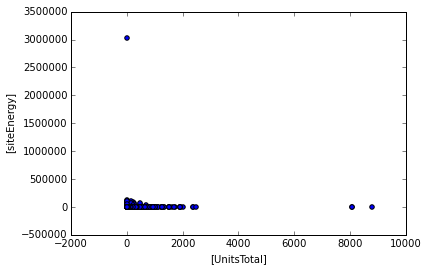

In [58]:
##Plotting using pandas plot
#df.plot(kind='scatter', x='a', y='b')
merged_data.plot(kind='scatter',y=['siteEnergy'],x =['UnitsTotal'])

Populating the interactive namespace from numpy and matplotlib
0.0
max site energy =  112726.6
min site energy =  1256.1
max units       =  697
min units       =  1


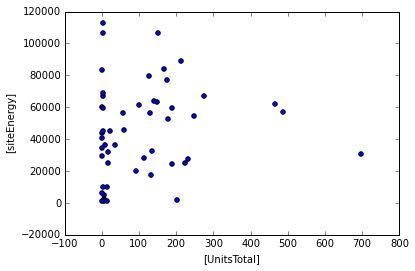

In [169]:
##Removing the outliers from x and y
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
#s = json.loads(open('/Users/bhagwatsinghbisht/Downloads/fbb_matplotlibrc.json'))
#pl.rcParams.update(s)
%pylab inline
print min(merged_data['siteEnergy'])
data_no_outlier = merged_data[(merged_data['siteEnergy']>=1000) 
                              & (merged_data['siteEnergy']<3000000) 
                              & (merged_data['UnitsTotal']>=1)
                              & (merged_data['UnitsTotal']<20000)]
print 'max site energy = ',max(data_no_outlier['siteEnergy'])
print 'min site energy = ',min(data_no_outlier['siteEnergy'])
print 'max units       = ',max(data_no_outlier['UnitsTotal'])
print 'min units       = ',min(data_no_outlier['UnitsTotal'])



data_no_outlier.plot(kind='scatter',y=['siteEnergy'],x =['UnitsTotal'])


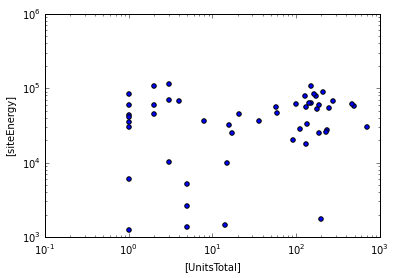

In [170]:
##Checking the graph with logs
data_no_outlier.plot(kind='scatter',x=['UnitsTotal'],y =['siteEnergy'],loglog=True)


In [172]:
import statsmodels.formula.api as smf
y = (data_no_outlier['siteEnergy'])
x = data_no_outlier['UnitsTotal']
model = smf.ols(formula ='y~x',data=data_no_outlier).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7879
Date:                Sat, 17 Oct 2015   Prob (F-statistic):              0.379
Time:                        02:07:47   Log-Likelihood:                -595.70
No. Observations:                  51   AIC:                             1195.
Df Residuals:                      49   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.252e+04   5146.848      8.261      0.0

###Fit for energy vs unit

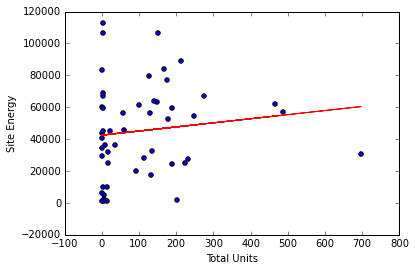

In [174]:
#Forming equation of linera regression 
y = 4.252e+04+25.7*x
fit = np.polyfit(x, y, deg=1)
#plt.plot(fit,color='red')
plt.plot(x,y,color = 'red')
plt.scatter(data_no_outlier['UnitsTotal'],data_no_outlier['siteEnergy'])
plt.xlabel('Total Units')
plt.ylabel('Site Energy')
#data_no_outlier.plot(kind='scatter',y=['siteEnergy'],x =['UnitsTotal'],loglog=True)


###Fit for unit vs energy

In [162]:
import statsmodels.formula.api as smf
Y = log(data_no_outlier['siteEnergy'])
X = log(data_no_outlier['UnitsTotal'])
model = smf.ols(formula ='X~Y',data=data_no_outlier).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.562
Date:                Sat, 17 Oct 2015   Prob (F-statistic):              0.116
Time:                        02:05:42   Log-Likelihood:                -109.94
No. Observations:                  51   AIC:                             223.9
Df Residuals:                      49   BIC:                             227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9733      2.648     -0.368      0.7

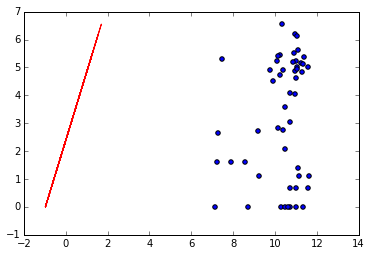

In [186]:
y2 = -0.9733+0.4083*X
fit = np.polyfit(y2, X, deg=1)
#plt.plot(fit,color='red')
plt.scatter(Y,X)
plt.plot(y2,X,color='red')
#data_no_outlier.plot(kind='scatter',y=['siteEnergy'],x =['UnitsTotal'],loglog=True)


#Question
###tell me which is better.
look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

##Answer



Both the models have similar output. However we can decide the better model by practical implementation of the model that means we cannot make the units as the dependent variable because the numebr of the units of the buolding cannot chane where as the enrgy per sq feet can change.
So we should select the model in which we keep the units as indepndent.


Likelihood ratio test is good for the ensted models so we cannont do the likelihood ratio test because the dependent variable is different in both the models and have different hypothesis.